In [1]:
import cfe

cfe.logger.setLevel("DEBUG")
cfe.settings.backend = "python_function"

[2024年12月25日 19时43分22秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

Data

In [2]:
import pandas as pd
import scanpy as sc

# 从Anndata创建
adata = sc.read_h5ad(f"../tests/data/bifurcating.h5ad")
fadata = cfe.data.FateAnnData.from_anndata(adata)
fadata.layers["counts"] = fadata.X.copy()
fadata.layers["expression"] = fadata.X.copy()

cluster_key = "lineage"
fadata.obs.index = fadata.obs["cell_id"] 

fadata

                        DEBUG    Create a FateAnnData object from an existing AnnData object.                      


AnnData object with n_obs × n_vars = 1000 × 250
    obs: 'cell_id', 'from', 'to', 'time', 'lineage', 'global_time', 'lin_time_sC -> sEndC', 'lin_time_sA -> sB', 'lin_time_sB -> sBmid', 'lin_time_sBmid -> sC', 'lin_time_sD -> sEndD', 'lin_time_sBmid -> sD'
    uns: 'endpoints', 'gt_velocities', 'lineage_colors', 'startpoints', 'cfe'
    obsm: 'X_emb', 'X_umap'
    layers: 'spliced', 'unspliced', 'counts', 'expression'

Method

In [3]:
method = cfe.method.FateMethod(method_name="comp1")

[2024年12月25日 19时43分23秒] DEBUG    FunctionBackend __init__                                                    
                        INFO     Loaded function: <function cf_comp1 at 0x7f568ad5a830> from                       
                                 /home/huang/PyCode/scRNA/CellFateExplorer/CellFateExplorer/cfe/method/function/cf_
                                 comp1.py                                                                          
                        INFO     method_backend: <cfe.method.fate_function_backend.FunctionBackend object at       
                                 0x7f55da102290>                                                                   


In [4]:
method.infer_trajectory(fadata)  # add parameters when inferring trajectory

                        DEBUG    FateAnnData add_trajectory                                                        


Plot

                        DEBUG    plot_trajectory                                                                   
                        DEBUG    add waypoints                                                                     
                        DEBUG    FateAnnData add_waypoints                                                         
[2024年12月25日 19时43分44秒] DEBUG    add waypoints shape is (201, 1000), finished!                               


<Axes: title={'center': 'lineage'}, xlabel='UMAP1', ylabel='UMAP2'>

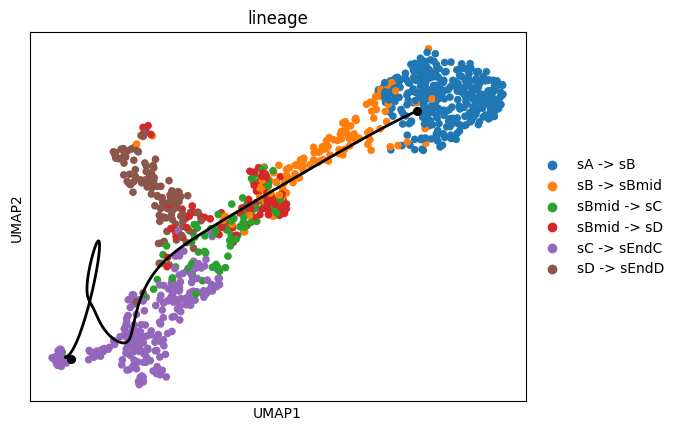

In [5]:
cfe.plot.plot_trajectory(fadata, basis="umap", color="lineage")